# Logistic Regression

Logistic regression is used for classification tasks where each data point would to one of two classes. A sigmoid function (logistic curve) that ranges from $0$ to $1$ is used to assign probabilities of data points belonging to one of the two classes. A cut-off then decides the classification of data.  
Fake advertising data is used here to determine whether or not a user clicked on an ad.

## Reading in data and first look

In [1]:
# begin with usual imports for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the data
ad_data = pd.read_csv('advertising.csv')

In [3]:
# check DF head
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# check DF info
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# check basic stat properties of numerical cols
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

In [6]:
# set seaborn theme (optional)
sns.set_theme(style = 'whitegrid', palette = 'viridis')

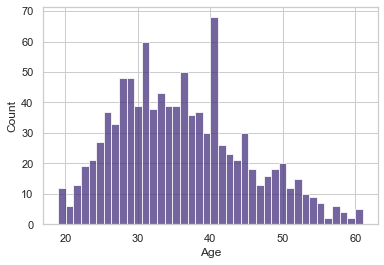

In [7]:
# let's check age distribution
sns.histplot(x = 'Age', data = ad_data, bins = 40)
plt.show()

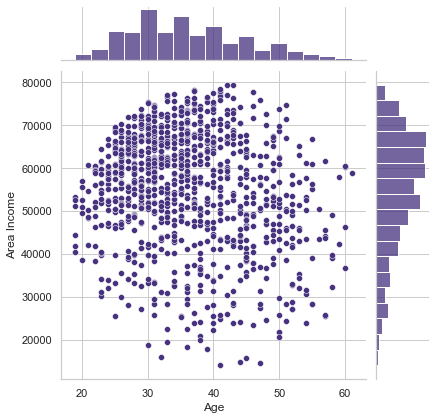

In [8]:
# check how income correlates with age
sns.jointplot(x = 'Age', y = 'Area Income', data=ad_data)
plt.show()

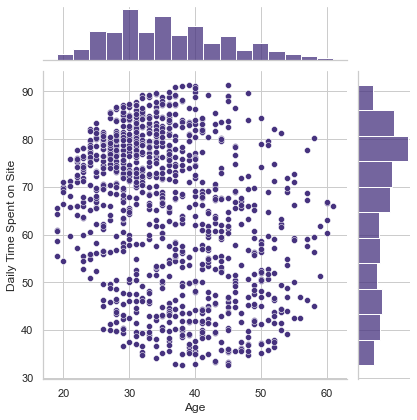

In [9]:
# check how time spent on the site correlates with age
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = ad_data)
plt.show()

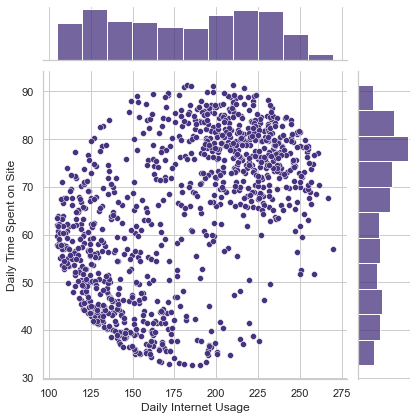

In [10]:
# does daily internet usage correlate with time spent on site?
sns.jointplot(x = 'Daily Internet Usage', y = 'Daily Time Spent on Site', data = ad_data)
plt.show()

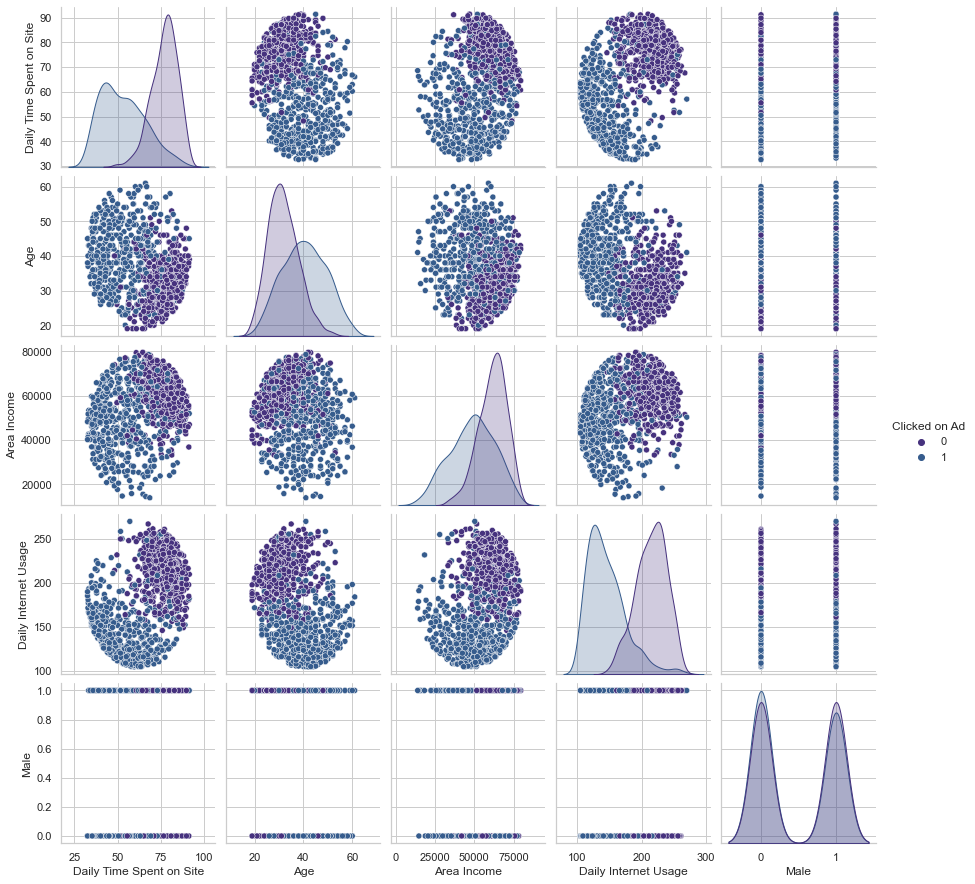

In [11]:
# check trends in entire data set; differentiate between clicked on ad or not
sns.pairplot(ad_data, hue = 'Clicked on Ad')
plt.show()

## Logistic Regression Analysis

In [12]:
# train-test splitting of data
from sklearn.model_selection import train_test_split

In [13]:
# choose appropriate columns of data to train the model
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 287)
# as splitting occurs randomly, use "random_state = 287" only to recreate my results exactly

In [15]:
# training the logistic regression model
from sklearn.linear_model import LogisticRegression

In [16]:
lg_mod = LogisticRegression()

In [17]:
lg_mod.fit(X_train, y_train)

LogisticRegression()

In [18]:
# predictions
predictions = lg_mod.predict(X_test)

In [19]:
# evaluation using confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[144   8]
 [ 25 123]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       152
           1       0.94      0.83      0.88       148

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Conclusion
Given ad data, when fitted to the logistic regression model with default parameters makes predictions with F1-score of $89\%$.  
Whether or not this performance is satisfactorily high is upto the company. Further improvements can be made by being judicious of the columns used to fit the data to the model (feature selection), and by iteratively fine-tuning the parameters.